In [13]:
import pandas as pd
import matplotlib.pyplot as plt

article = pd.read_csv("articles.APOE.csv")
article_author = article[["PMID", "Title", "FirstAuthorForename", "FirstAuthorLastname"]]

article_author["fullname"] = article_author["FirstAuthorForename"] + article_author["FirstAuthorLastname"]
article_author 

/var/folders/9z/g5_jr5bj6zjdxm_7vzw2m89h0000gn/T/ipykernel_35754/568921699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_author["fullname"] = article_author["FirstAuthorForename"] + article_author["FirstAuthorLastname"]


,PMID,Title,FirstAuthorForename,FirstAuthorLastname,fullname
0,10545039,No evidence of association between apolipoprot...,K E,Morrison,K EMorrison
1,10558867,Association of the estrogen receptor alpha gen...,M L,Brandi,M LBrandi
2,10560469,Initial evaluation of suspected dementia. Aski...,D C,Steffens,D CSteffens
3,10563634,APOE-epsilon4 is associated with less frontal ...,C,Geroldi,CGeroldi
4,10570509,[Frequency of the APOE-4 allele in Alzheimer's...,V,Alvarez,VAlvarez
...,...,...,...,...,...
6299,38071369,Spinal apolipoprotein E is involved in inflamm...,Siyi,Liu,SiyiLiu
6300,38073392,Differential Associations of APOE_2 and APOE_4...,Bing,Zhao,BingZhao
6301,38083439,Predictive Modeling Of Alzheimer's Disease Pro...,Nikita,Goel,NikitaGoel
6302,38084238,The associations of PON1 and APOE polymorphism...,Jasna,Klen,JasnaKlen


1996      2
1997      1
1998      3
1999     34
2000    139
2001    125
2002    125
2003    148
2004    189
2005    175
2006    177
2007    196
2008    229
2009    213
2010    253
2011    267
2012    282
2013    279
2014    342
2015    335
2016    362
2017    298
2018    271
2019    312
2020    330
2021    375
2022    400
2023    438
2024      4
Name: Year, dtype: int64


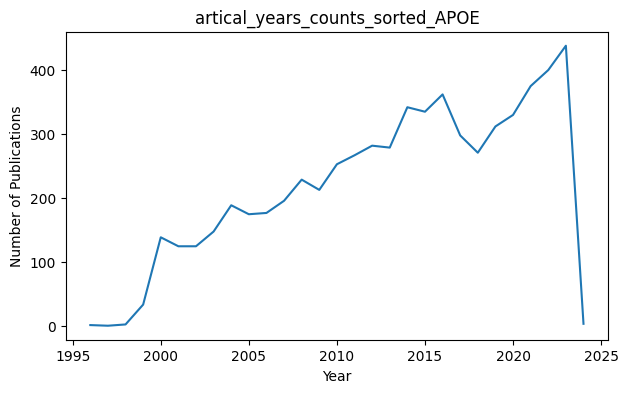

In [14]:
artical_years = article[["PMID", "Title", "Year"]]
artical_years_counts = artical_years['Year'].value_counts()
 
artical_years_counts.columns = ['Year', 'Amount']

artical_years_counts_sorted = artical_years_counts.sort_index()
print(artical_years_counts_sorted)

# Create a bar plot
plt.figure(figsize=(7, 4))
artical_years_counts_sorted.plot()
plt.title('artical_years_counts_sorted_APOE')
plt.xlabel('Year')
plt.ylabel('Number of Publications')

# Show the plot
plt.show()

     Year    Count
114  1996   306294
115  1997   313743
116  1998   329438
117  1999   340740
118  2000   373439
119  2001   388963
120  2002   405519
121  2003   426752
122  2004   459362
123  2005   492511
124  2006   521278
125  2007   548061
126  2008   585286
127  2009   618504
128  2010   653739
129  2011   702139
130  2012   765156
131  2013   809074
132  2014   850568
133  2015   876117
134  2016   896208
135  2017   907250
136  2018   959228
137  2019   999175
138  2020  1132241
139  2021  1277048
140  2022  1324650
141  2023  1302390
142  2024    15611


<Figure size 700x400 with 0 Axes>

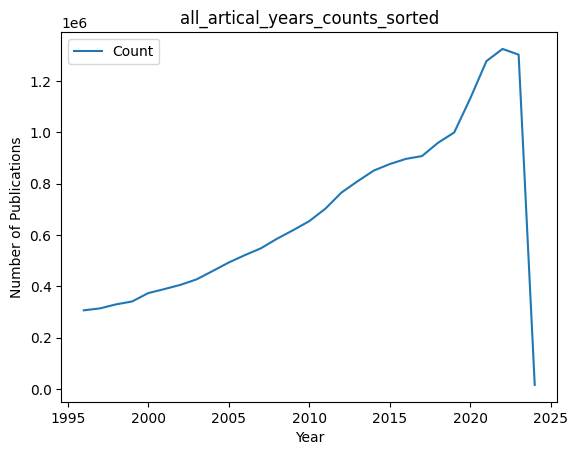

In [15]:
paper_count = pd.read_csv('paper_counts.csv')
paper_count = paper_count[paper_count['Year'] >= 1996]
print(paper_count)

# Create a bar plot
plt.figure(figsize=(7, 4))
paper_count.plot(x = 'Year', y = 'Count')
plt.title('all_artical_years_counts_sorted')
plt.xlabel('Year')
plt.ylabel('Number of Publications')

# Show the plot
plt.show()

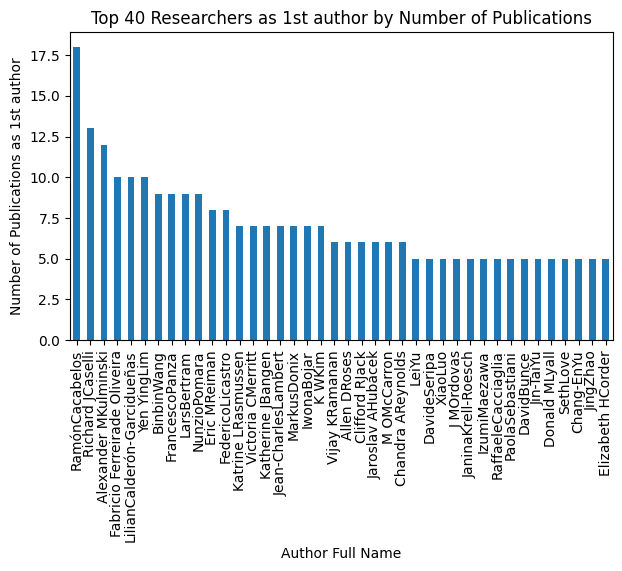

In [16]:
# Group by 'fullname' and count the number of publications for each author
author_publication_counts = article_author['fullname'].value_counts()

# Select the top 10 authors with the most publications
top_20_authors = author_publication_counts.head(40)

# Create a bar plot
plt.figure(figsize=(7, 4))
top_20_authors.plot(kind='bar')
plt.title('Top 40 Researchers as 1st author by Number of Publications')
plt.xlabel('Author Full Name')
plt.ylabel('Number of Publications as 1st author')


# Show the plot
plt.show()



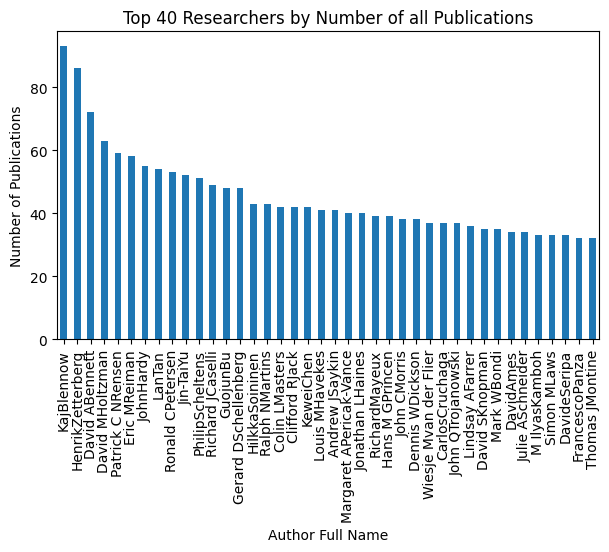

KajBlennow                 93
HenrikZetterberg           86
David ABennett             72
David MHoltzman            63
Patrick C NRensen          59
Eric MReiman               58
JohnHardy                  55
LanTan                     54
Ronald CPetersen           53
Jin-TaiYu                  52
PhilipScheltens            51
Richard JCaselli           49
GuojunBu                   48
Gerard DSchellenberg       48
HilkkaSoininen             43
Ralph NMartins             43
Colin LMasters             42
Clifford RJack             42
KeweiChen                  42
Louis MHavekes             41
Andrew JSaykin             41
Margaret APericak-Vance    40
Jonathan LHaines           40
RichardMayeux              39
Hans M GPrincen            39
John CMorris               38
Dennis WDickson            38
Wiesje Mvan der Flier      37
CarlosCruchaga             37
John QTrojanowski          37
Lindsay AFarrer            36
David SKnopman             35
Mark WBondi                35
DavidAmes 

In [17]:
authors = pd.read_csv('authors.APOE.csv')
authors["fullname"] = authors["AuthorForename"] + authors["AuthorLastname"]

# Group by 'fullname' and count the number of publications for each author
author_publication_counts_all = authors['fullname'].value_counts()

# Select the top 10 authors with the most publications
top_40_authors_all = author_publication_counts_all.head(40)

# Create a bar plot
plt.figure(figsize=(7,4))
top_40_authors_all.plot(kind='bar')
plt.title('Top 40 Researchers by Number of all Publications')
plt.xlabel('Author Full Name')
plt.ylabel('Number of Publications')


# Show the plot
plt.show()
top_40_authors_all

In [21]:
print(top_20_authors)
print(top_40_authors_all)

RamónCacabelos                  18
Richard JCaselli                13
Alexander MKulminski            12
Fabricio Ferreirade Oliveira    10
LilianCalderón-Garcidueñas      10
Yen YingLim                     10
BinbinWang                       9
FrancescoPanza                   9
LarsBertram                      9
NunzioPomara                     9
Eric MReiman                     8
FedericoLicastro                 8
Katrine LRasmussen               7
Victoria CMerritt                7
Katherine JBangen                7
Jean-CharlesLambert              7
MarkusDonix                      7
IwonaBojar                       7
K WKim                           7
Vijay KRamanan                   6
Allen DRoses                     6
Clifford RJack                   6
Jaroslav AHubacek                6
M OMcCarron                      6
Chandra AReynolds                6
LeiYu                            5
DavideSeripa                     5
XiaoLuo                          5
J MOrdovas          

In [33]:
top_20_authors_index = top_20_authors.reset_index()
top_40_authors_all_index = top_40_authors_all.reset_index()

first_series = pd.Series(top_20_authors_index["index"].values)
all_series = pd.Series(top_40_authors_all_index["index"].values)

df = pd.concat([first_series,all_series],axis=1)

df.columns = ['1st', 'all']
df["isin"] = df["1st"].isin(df["all"])
df


,1st,all,isin
0,RamónCacabelos,KajBlennow,False
1,Richard JCaselli,HenrikZetterberg,True
2,Alexander MKulminski,David ABennett,False
3,Fabricio Ferreirade Oliveira,David MHoltzman,False
4,LilianCalderón-Garcidueñas,Patrick C NRensen,False
5,Yen YingLim,Eric MReiman,False
6,BinbinWang,JohnHardy,False
7,FrancescoPanza,LanTan,True
8,LarsBertram,Ronald CPetersen,False
9,NunzioPomara,Jin-TaiYu,False


In [39]:
# Filter out rows whose isin column is True
isin_true = df[df['isin']]
print(isin_true["1st"])


1     Richard JCaselli
7       FrancescoPanza
10        Eric MReiman
21      Clifford RJack
26        DavideSeripa
34           Jin-TaiYu
Name: 1st, dtype: object
